### Student Information
Name: 王妤瑄

Student ID: 110102042

GitHub ID: bbswei

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [2]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Downloading package punkt to /Users/ake/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Data Preparation

In [14]:
### Begin Assignment Here
df = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')
df.columns = [c.lower().strip() for c in df.columns]
df.head()

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


可以看到 downvotes 和 upvote_ratio 的資料嚴重缺失

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   type          847 non-null    object 
 1   datetime      847 non-null    object 
 2   post_id       847 non-null    object 
 3   subreddit     847 non-null    object 
 4   title         847 non-null    object 
 5   author        847 non-null    object 
 6   url           847 non-null    object 
 7   upvotes       847 non-null    int64  
 8   downvotes     64 non-null     float64
 9   upvote_ratio  64 non-null     float64
 10  text          847 non-null    object 
 11  subjectivity  847 non-null    float64
 12  polarity      847 non-null    float64
 13  sentiment     847 non-null    float64
 14  entities      847 non-null    object 
 15  label         847 non-null    float64
dtypes: float64(6), int64(1), object(9)
memory usage: 106.0+ KB


In [12]:
df.subreddit.unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

## 2. EDA

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

Sentiment 和 Label 兩標籤有不一致的情況，所以接下來的動作是為了選取一個較具有代表性的指標
（從下面可以看到有超過一半都是不一致的）

In [58]:
(df['sentiment'] == df['label']).value_counts(normalize=True)

False    0.540732
True     0.459268
Name: proportion, dtype: float64

可能因為Sentiment是直接由Polarity轉換的，所以數量一致。

Text(0, 0.5, 'Count')

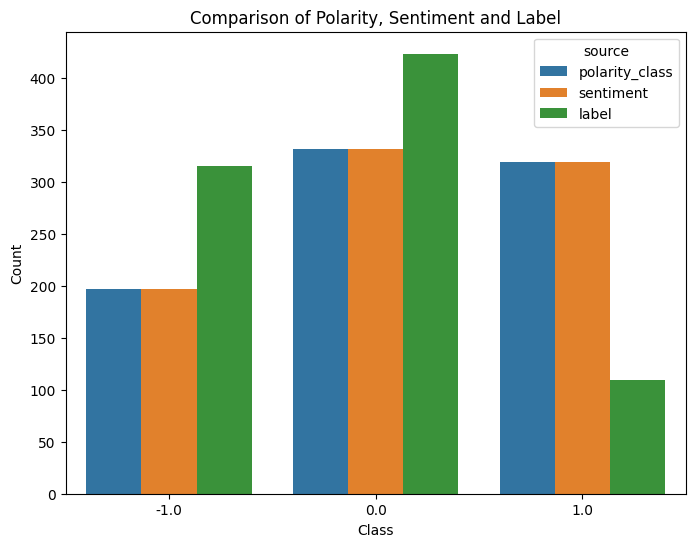

In [68]:
df['polarity_class'] = df['polarity'].apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))
df_long = pd.melt(
    df,
    value_vars=['polarity_class','sentiment', 'label'],
    var_name='source',
    value_name='class')

plt.figure(figsize=(8,6))
sns.countplot(x='class', hue='source', data=df_long)
plt.title("Comparison of Polarity, Sentiment and Label")
plt.xlabel("Class")
plt.ylabel("Count")

從下圖可以看到，兩標籤差異甚大，會影響我們對資料集的解讀。因為Sentiment跟Polarity分數對應，所以本次作業採用Sentiment作爲標籤

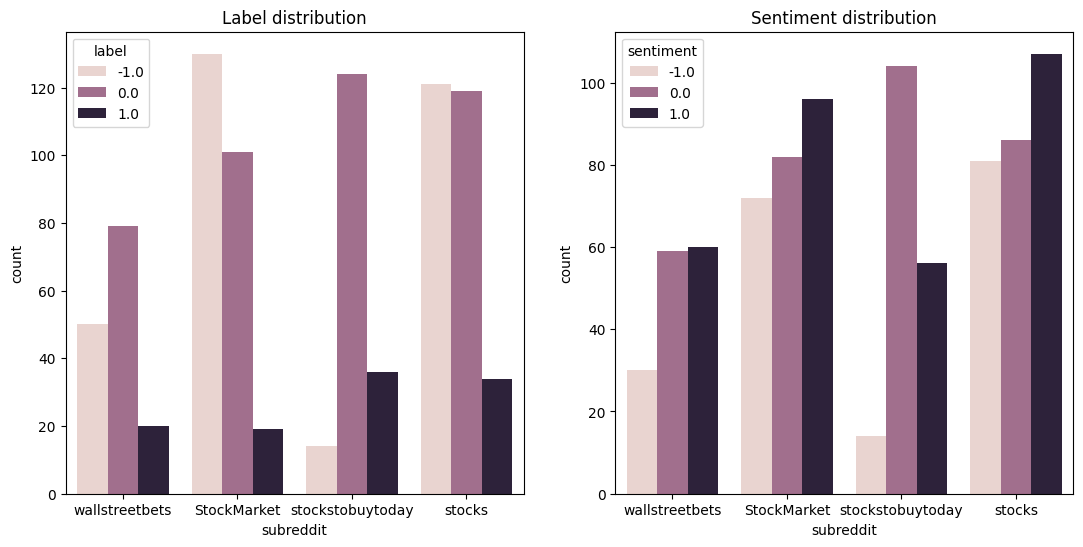

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13,6)) 

# (1) 不同 subreddit 下，各 label 的數量
sns.countplot(x="subreddit", data=df, hue="label", ax=axes[0])
axes[0].set_title("Label distribution")
axes[0].tick_params(axis='x')

# (2) 不同 subreddit 下，各 sentiment 的數量
sns.countplot(x="subreddit", data=df, hue="sentiment", ax=axes[1])
axes[1].set_title("Sentiment distribution")
axes[1].tick_params(axis='x')

分析熱門文章（評論越多代表可能受到越多討論）

In [49]:
df['subreddit'].value_counts().head(10)

subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64

In [81]:
df['title'].value_counts().head(10)

title
Weekend Discussion Thread for the Weekend of April 11, 2025                                                                               51
r/Stocks Daily Discussion & Fundamentals Friday Apr 11, 2025                                                                              50
How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?    46
Data Shows US Allies—Not China—Dumping Treasuries                                                                                         44
It's fucking awful seeing the "Silver" misinformation campaign everywhere I look                                                          41
The Trump administration is begging Xi Jinping to call Trump quickly.                                                                     40
$ U.S. dollar value (crashing)                                                                                                            37
BREAKIN

In [82]:
top_titles = df['title'].value_counts().head(10).index
df_top = df[df['title'].isin(top_titles)]
sentiment_dist = df_top.groupby(['title','sentiment']).size().unstack(fill_value=0)
sentiment_dist = sentiment_dist.loc[sentiment_dist.sum(axis=1).sort_values(ascending=False).index]
print(sentiment_dist)

sentiment                                           -1.0   0.0   1.0
title                                                               
Weekend Discussion Thread for the Weekend of Ap...     8    17    26
r/Stocks Daily Discussion & Fundamentals Friday...    10    26    14
How do you feel about a sitting president makin...    14    14    18
Data Shows US Allies—Not China—Dumping Treasuries      9    17    18
It's fucking awful seeing the "Silver" misinfor...    20     9    12
The Trump administration is begging Xi Jinping ...    16    14    10
$ U.S. dollar value (crashing)                         9    14    14
BREAKING: China raises tariffs on U.S. goods to...     6    13    18
PRESIDENT TRUMP JUST ASKED THE SUPREME COURT FO...    15    10    11
Retail giant TARGET has now declined for 10 con...     7    12    12


In [88]:
# 取 upvotes 最高的
top5 = df.sort_values(by="upvotes", ascending=False).head(5)

for i, row in top5.iterrows():
    print(f"Example {i}")
    print(f"Upvotes: {row['upvotes']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Polarity: {row['polarity']:.3f}, Subjectivity: {row['subjectivity']:.3f}")
    print("Text:")
    print(row['text'])
    print("="*80)

Example 42
Upvotes: 3943
Sentiment: -1.0
Polarity: -1.000, Subjectivity: 0.667
Text:
So they went from saying redditors are bad for manipulating the market o praising silver??
Example 497
Upvotes: 1105
Sentiment: 1.0
Polarity: 1.000, Subjectivity: 0.602
Text:


> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue
Example 324
Upvotes: 338
Sentiment: 0.0
Polarity: 0.000, Subjectivity: 0.000
Text

In [90]:
# 取 downvotes 最高的
top5 = df.sort_values(by="downvotes", ascending=False).head(5)

for i, row in top5.iterrows():
    print(f"Example {i}")
    print(f"Downvotes: {row['downvotes']}")
    print(f"Sentiment: {row['sentiment']}")
    print(f"Polarity: {row['polarity']:.3f}, Subjectivity: {row['subjectivity']:.3f}")
    print("Text:")
    print(row['text'])
    print("="*80)

Example 497
Downvotes: 11.0
Sentiment: 1.0
Polarity: 1.000, Subjectivity: 0.602
Text:


> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue
Example 63
Downvotes: 4.0
Sentiment: 1.0
Polarity: 1.000, Subjectivity: 0.368
Text:
Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/), and help out users by giving constructive criticism.

## 3. Deal with Missing Values

In [94]:
df.isnull().sum()

type                0
datetime            0
post_id             0
subreddit           0
title               0
author              0
url                 0
upvotes             0
downvotes         783
upvote_ratio      783
text                0
subjectivity        0
polarity            0
sentiment           0
entities            0
label               0
polarity_class      0
dtype: int64

In [138]:
df_new = df.copy()
df_new['downvotes'] = df_new['downvotes'].fillna(0) # 直接假設缺失值都是 0 (沒有被 downvote)
df_new['upvote_ratio'] = df_new['upvote_ratio'].fillna(df_new['upvote_ratio'].mean()) # 直接用平均值填補 


In [139]:
import helpers.data_mining_helpers as dmh
df_new.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,polarity_class
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. Dealing with Duplicate Data

In [140]:
print(sum(df_new.duplicated()))
print(sum(df_new.duplicated('text')))
print(len(df_new))

0
23
847


In [141]:
dup = df_new[df_new.duplicated(subset='text', keep=False)]
dupp = dup.groupby('text').head(2)[:5]
dupp


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label,polarity_class
34,comment,2021-02-01 13:45:52,gllif2v,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,1,0.0,0.981406,So they went from saying redditors are bad for...,0.666667,-1,-1.0,"['market', 'silver']",1.0,-1
42,comment,2021-02-01 13:45:17,gllicpw,stocks,"It's fucking awful seeing the ""Silver"" misinfo...",SmithRune735,https://www.reddit.com/r/stocks/comments/la34b...,3943,0.0,0.981406,So they went from saying redditors are bad for...,0.666667,-1,-1.0,"['market', 'silver']",1.0,-1
70,post,2025-03-29 18:14:28,1jmshlc,stockstobuytoday,FINRA Daily Shorts Data,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,Updated Daily by EOD\n\n \n[Daily Shorts](),0.100000,0,0.0,"['EOD', 'Daily', 'Shorts', ']', '[']",0.0,0
105,post,2025-04-04 9:01:07,1jr7fe1,stockstobuytoday,World Markets,AutoModerator,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,\n\n [World Markets (stockbuyvest.com)](),0.000000,0,0.0,"[']', 'World', 'stockbuyvest.com', 'Markets']",0.0,0
159,post,2025-04-11 13:54:31,1jwqgce,stockstobuytoday,Gappers (Up/Down),saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.000000,Gappers for today\n\n [Gappers (stockbuyvest.c...,0.000000,0,0.0,"['Gappers', 'stockbuyvest.com', ']', 'today', ...",0.0,0


In [143]:
df_new.drop_duplicates(subset='text', keep=False, inplace=True) 

In [144]:
len(df_new)

824

# Phase 2

In [51]:
### Begin Assignment Here